<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Poliynomial Regression-Overfiting-Underfiting</strong></p> 

Polynomial Regression is a form of regression analysis in which the relationship 
between the independent variables and dependent variables are modeled in the nth degree polynomial.

Polinom Regresyon , bağımsız değişkenler ile bağımlı değişkenler arasındaki ilişkinin n'inci derece 
polinomda modellendiği bir regresyon analizi şeklidir.

Types of polinomials

1st degree ---> linear    b1x + b0

2nd degree ---> Quadratic b2x**2 + b1x + b0

3rd degree ---> Cubic     b3x**3 + b2x**2 + b1x + b0

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = np.array([[2, 3, 4]])   # Çalışma mantığını anlatmak için array ürettik
print(data)

[[2 3 4]]


In [4]:
trans = PolynomialFeatures(degree = 2, include_bias =False)  # Datayı polinomial Featurelara dönüştürüyoruz
# include_bias = False : İlerde neden False olduğundan bahsedilecek(basitçe formülde b0 ın olmaması) 

In [5]:
trans.fit(data) # 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2  # Veriyi öğrenme/tanıma aşaması

PolynomialFeatures(include_bias=False)

In [7]:
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

In [ ]:
# NOT: Orion hoca: fit kalıbını çıkar, transform o kalıbı uygula demek

In [7]:
trans.transform(data)  # Veriyi fit ettikten sonra dönüştürüyor. Ancak alttaki komut tek aşamada yapıyor

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [8]:
trans.fit_transform(data) # combining method # Daha kullanışlı
# Orion hoca: Eldeki feature lar ile sentetik feature lar ürettik diyebiliriz.
# 3ten 9 a çıkardı featureları

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## Read Dataset

In [9]:
df = pd.read_csv("Advertising.csv")  # Şimdi gerçek dataya uygulayalım üsttekileri

In [11]:
df                 # target ımız sales , diğerleri feature larımız diğer adı ile independent variable

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Polynomial Converter

In [12]:
X = df.drop("sales", axis =1)  # sales (dependent variable) haricindeki diğer değişkenleri seçiyoruz(Independent variables)
y = df.sales

# büyük  x (X) olmasının sebebi birden çok feature var. matris yapısı oluşuyr. vektörler küçük harf ile gösterilir.

In [13]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False) # polynomial featurelara dönüştürüyoruz

In [14]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [15]:
poly_features = polynomial_converter.transform(X) # transform ettiğimiz datayı poly_features adlı değişkene atıyoruz

In [16]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [17]:
poly_features.shape   # Shape de columns 3 dü, 9 a çıktı(2.dereceden olduğu için)

(200, 9)

In [18]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()
# asıl featurelara bağımlı yeni featureları isimlendirebilirim

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [19]:
X.shape       # featurelar aslında 3 tane

(200, 3)

## Train | Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)
# test_size    : train datasının ve test datasının oranını belirleme. Test oranı:%30, Train oranı:%70
# random_state : Her seferinde aynı sonuçları almak için kullanılır(Çalışırken hocayla aynı sonuçları almak için)
#burada X yerine poly_features kullanıldı. çünkü polynomial kullanılacak

In [22]:
X_train.shape

(140, 9)

## Model for fitting

In [23]:
from sklearn.linear_model import LinearRegression   # polynomial regression yapacağız ama modelin ismi linearReggression. 
# kafanız karışmasın, öyle adlandırmışlar. çok kullanılan bir şey olmadığı için üzerinde durmayın.

In [24]:
model_poly = LinearRegression()  # build ediyoruz, inşa ediyoruz.

In [25]:
model_poly.fit(X_train, y_train)      # modeli eğitiyoruz. öğrenme. giriş ve çıkış için a ve b katsayılarını optimize eder.
# What is learning? - optimizing the weights (slope, intercept), generating a 'rule'
# fit eğitim için kullanılıyor burada. uydurma anlamına geliyor. 

LinearRegression()

In [ ]:
# eğitmek ne demek? : modelin öğrenmesi. model nasıl öğreniyor?  
# model, giriş ve çıkış için örneğin lineer modelde a ve b katsayılarını optimize eder. 
# sonuçta bir optimizasyondur aslında. bütün öğrenmeler katsayıların optimizasyonudur.
# öğrenme dediğimiz, katsayıların optimize edilmesidir. 
# (Katsayı=Weight(deep learning de)  
# What is learning? - optimizing the weights (slope, intercept), generating a 'rule'

In [26]:
y_pred = model_poly.predict(X_test)  
# şimdi predict ediyoruz 
# eğittikten sonra test etmek demek, predict etmek demek
# predikt ne yapıyor? kestirim. kestirim demek tahmin etmek demek 
# neyi kestireceğiz? x test datalarım girdiğinde y_test datalara ne kadar yaklaştığını bakmak istiyorum 
# modelim bir predict ediyor buna y pred diyoruz, sonra bunlar arasındaki farklar(y test ile y pred arasındaki) hatalarım  

In [27]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}  # önce bir dictionary olarak yazdık
compare = pd.DataFrame(my_dict)  # sonra dataframe e konvert ettik
compare.head(20)

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


In [ ]:
# şu ana kaar ben modelimi kurdum, eğittim, test ettim ve sonuçlarını aldım. şimdi bunu evaluate etme sırası geldi.

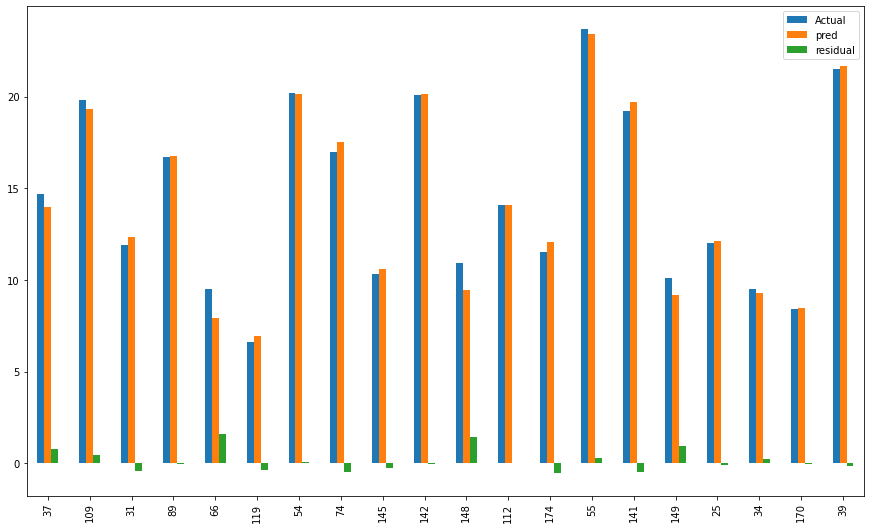

In [28]:
compare.head(20).plot(kind='bar',figsize=(15,9))   # karşılaştırmayı bir de grafikle görmek istedim
plt.show();

## Poly Coefficients

In [29]:
model_poly.coef_
# bir polinom bulmuş oldu. 2.dereceden bir polinom bu.
# asıl coef lerden çok important features önemli. ancak o da bu coef ler ile ilgili. görmekte fayda var.

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [30]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [31]:
df_coef  # coef lar şunun için önemli: hangi feature hangi katsayı
# diğer sentetik feature lar, türetilmiş olanlar, polynomial hale dönüştürülmüş olanlar
# aslında coef ler bize hangi featureların daha önemli olduğunu verecek, ancak bunun için scaling yapmamız gerekir, 
# bunu ridge ve lasso da detaylı göreceğiz

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


In [32]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])

## Evaluation on the Test Set

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
y_pred = model_poly.predict(X_test)
# Tahminlerimizi yaptık.(Dikkat: X_test ile)
# Şimdi metriklerimize bakarak tahminlerin ne kadar iyi olduğuna bakalım

In [35]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

# bu fonksiyonu dönem boyu kullanacağız. kendimiz yazdık. evaluate edeceğimiz 4 metrik i bu fonksiyonla aldık.
# gerçek ve tahmin değerleri fonksiyona girince R2 score, MAE, MSE ve RMSE yi veriyor.

In [36]:
eval_metric(y_test, y_pred)

Model performance:
--------------------------
R2_score 	: 0.9843529333146798
MAE 		: 0.48967980448035264
MSE 		: 0.44175055104033295
RMSE 		: 0.6646431757268956


In [36]:
# gerçek değer predict değer çok yakın.
# burada artık kritik bir noktaya geliyoruyz. tamam bize böyle bir test sonucu üretti, 
# burada bir overfitting ya da underfitting durumu var mı?, 
# skorlar bunu çok göstermiyor ama bunu görmek için bir train datasındaki sonuçları görmemiz lazım , 
# bir de test datasındaki. onu için de şimdi de train datası ile predict yapacağız.  

In [37]:
y_train_pred = model_poly.predict(X_train)
# Tahminlerimizi yaptık.(Dikkat: X_train ile)

In [38]:
eval_metric(y_train, y_train_pred)
# X_test ile X_train metric leri arasında çok fark olmadığı için
# underfitting, overfitting durumu yok diyebiliriz
# burada skorlar birbirine yakın

Model performance:
--------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.4049248139151387
MSE 		: 0.3456939142443997
RMSE 		: 0.5879574085292231


In [ ]:
# önceki derste simple linear regression ile bulduğumuz değerler ile karşılaştıralım. 
# RMSE 1.5ten 0.66 ya düşmüş. yani ikinci dereceden kullanmak bu data için sağlıklı ama en sağlıklısı bu mu? 
# şu ana kadar geldiğimiz noktada ikinci dereceden bir polinomun linear regressiona göre daha sağlıklı sonuç verdiğini söyleyebilirz. 
# R2 yine daha yüksek. ikinci dereceden polinomun bu data için daha iyi olduğunu söyleyebiliriz.    

* Simple Linear Regression:
    * MAE      : 1.213
    * RMSE     : 1.516
    * r2_score : 0.8609

* Polynomial 2-degree:
    * MAE      : 0.48
    * RMSE     : 0.66
    * r2_score : 0.9868

In [ ]:
# şu anda 2. dereceden bir polynomun(lineer regression a göre) daha iyi sonuçlar ürettiğini söyleyebiliriz.
# acaba derece artarsa daha mı iyi sonuçlar olur, buna bakacağız.
# hepsini sıra ile deneyeceğiz.
# Polynomial regression un dezavantajı: derecenin bulunması. uğraştıran bir iş.
# büyük datalarda bu modeller ile çalışılmaz. bunlar nal toplar. şimdi eğitim maksatlı görüyoruz bunları.

## Let's find optimal degree of poly

In [39]:
def poly(d):        # bütün dereceleri deneyen bir fonksiyon hazır. kullanacağız.
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    degrees=[]
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        degrees.append(i)
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "Degree":degrees}, 
                        index=range(1,d))
        

In [40]:
poly(10)
# 10.dereceye kadar rmse değerlerini alıyoruz.
# 1. derece de her iki hata da yüksek, bu bize underfitting i hatırlatıyor.
# 5.derece ve sonrasında test hataları bariz oranda yüksek çıkıyor.
# belli bir seviye sonrası müthiş bir ezber olduğunu söyleyebiliriz
# .. Çünkü veriyi o kadar ezberlemiş ki train hatasında hata neredeyse hiç yok ama
# .. hiç görmediği veri ile(test verisi) karşılaştırınca ezberlediği için tahminler doğru gelmemiş

,train_rmse_errors,test_rmse_errors,Degree
1,1.734594,1.516152,1
2,0.587957,0.664643,2
3,0.433934,0.580329,3
4,0.351708,0.507774,4
5,0.250934,2.575825,5
6,0.209572,4.370884,6
7,5.421813,1378.899211,7
8,0.191081,3388.345399,8
9,0.176078,95649.827142,9


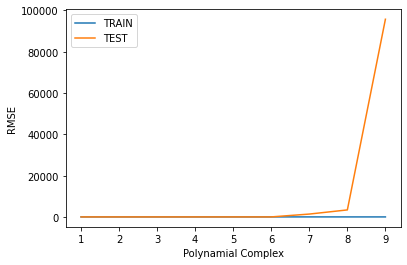

In [41]:
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

# grafiğini görelim. 1-6 arası net görünmüyor. range 1-6 olarak değiştirip tekrar görelim

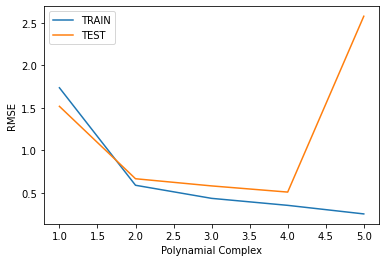

In [42]:
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

# teorideki grafikle aynı. (underftting - overfitting durumları net görülüyor.)

In [ ]:
# Derece 1 den 5 e kadar olan kısmı inceleyelim
# Derece 4-5 arası ezberleme yapmış
# derece 1 de de underfitting var
# Hangi noktayı seçeceğiz optimal değeri seçmek için
# Orion Hoca: Sınır değerlerden(2.0 ve 4.0) uzak durulmalı(underfitting ve overfitting e gitmeye meyilli)
# .. O yüzden orta yolu seçmek daha anlamlı(yani 3.0)
# sınır değerler(2 ve 4) her zaman sıkıntı. data biraz daha artarsa underfitting ve overfitting e gitmeye meyilli

## Finalizing Model Choice

In [43]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias=False) # yukarıda 3 üncğ dereceyi seçmiştik

In [44]:
final_model = LinearRegression()

In [45]:
final_model.fit(final_poly_converter.fit_transform(X), y)
# Burada datayı bölmedik artık çünkü optimal noktayı belirlediğimiz için tüm datayla eğitimi yapalım ki 
# .. en ideal tahminleri elde edelim

LinearRegression()

## Predictions

In [46]:
new_record = [[150, 20, 15]]  # gerçek bir data veriyorum

In [47]:
new_record_poly = final_poly_converter.fit_transform(new_record)
# yukarda kullandığım aynı konverter ile bu datayı da dönüştürüyorum
# artık benim polynomial formata gelmiş oldu

In [48]:
new_record_poly # 19 feature olmuş(3.derece)

array([[1.500e+02, 2.000e+01, 1.500e+01, 2.250e+04, 3.000e+03, 2.250e+03,
        4.000e+02, 3.000e+02, 2.250e+02, 3.375e+06, 4.500e+05, 3.375e+05,
        6.000e+04, 4.500e+04, 3.375e+04, 8.000e+03, 6.000e+03, 4.500e+03,
        3.375e+03]])

In [49]:
final_model.predict(new_record_poly)  # yeni datamı predikt etmesini istiyorum
# Sonuç: 14.24
# Kulanıcı derse ki eğer benim tv değerim 150, radio :20, newspaper:20 olursa sonucum(sales) ne olur?? --> 14.24

array([14.24950844])

## <span style='color:red'> Overfitting</span> 

In [50]:
over_poly_converter = PolynomialFeatures(degree =5, include_bias =False)
# Dereceyi 5 seçerek overfitting durumunu gözlemleyelim

In [51]:
over_model = LinearRegression()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [53]:
over_model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred_over = over_model.predict(X_test)
eval_metric(y_test, y_pred_over)

Model performance:
--------------------------
R2_score 	: 0.7649888931131349
MAE 		: 0.6659641306175682
MSE 		: 6.634872085339158
RMSE 		: 2.5758245447505073


In [55]:
y_train_over = over_model.predict(X_train)
eval_metric(y_train, y_train_over)

Model performance:
--------------------------
R2_score 	: 0.9976072484224286
MAE 		: 0.18620768826371656
MSE 		: 0.06296802163601942
RMSE 		: 0.2509342974485939


In [ ]:
# Gördüğümüz gibi metricler arasındaki değerlerde kayda değer(örneğin R_2 0.99-0.76) fark var. overfitting.
# RMSE ye bakarsak train datasında hata çok çok düşük(0.25) ama hiç görmediği test te 2.575 e çıkmış. overfitting

## <span style='color:red'> Underfitting</span> 

In [ ]:
# burada da 1 seçtiğimiz durum:

In [ ]:
# Gördüğümüz gibi metricler arasındaki değerlerde fark var
# r2 de performance düşmüş(0.90 dan, 0.86 ya). Çok düşmemiş ama bu data için ideal
# .. olan değerler daha yüksek olmalıydı
# RMSE de de fark var

# NOT: Ares hoca: R2 score negatif olması aşırı ezberi ve best fit line nın ters çizildiğini gösterir

# NOT: Orion hoca: fit kalıbını çıkar. Transform o kalıbı uygula

In [ ]:
# R2 genelde 0-1 arasındadır. ama eksideğerlere de gidebilir. sebebi, hata çok büyüktür.